In [1]:
%matplotlib inline
import pandas as pd
import pylab, math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.font_manager as fm
zhfont = fm.FontProperties(fname='msyh.ttf')
import re
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
delay = pd.read_csv('video_process_delay.csv')
retain = pd.read_csv('user_retention.csv')

In [3]:
delay.head(8)

,user,video,delay
0,3,0,2275
1,3,1,839
2,5,2,119
3,6,3,70
4,9,4,66
5,10,5,198
6,11,6,348
7,12,7,93


1.6740126438414547

In [4]:
retain.head(8)

,user,retain
0,0,1
1,1,1
2,2,0
3,3,1
4,4,1
5,5,0
6,6,0
7,7,1


In [5]:
delay.describe()

,user,video,delay
count,282801.000000,282801.000000,282801.000000
mean,88253.622151,141400.000000,505.997468
std,49080.766603,81637.761076,4272.765087
min,0.000000,0.000000,3.000000
25%,46107.000000,70700.000000,79.000000
50%,89574.000000,141400.000000,236.000000
75%,131667.000000,212100.000000,629.000000
max,168935.000000,282800.000000,857526.000000


In [6]:
lay

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168936 entries, 0 to 168935
Data columns (total 2 columns):
user      168936 non-null int64
retain    168936 non-null int64
dtypes: int64(2)
memory usage: 2.6 MB


In [13]:
# 平均每个用户看多少个video
delay.groupby('user').count()['video'].mean()

1.6740126438414547

In [14]:
# 每个用户看video个数的分布(画图)
video_num = delay.groupby('user').count()['video']

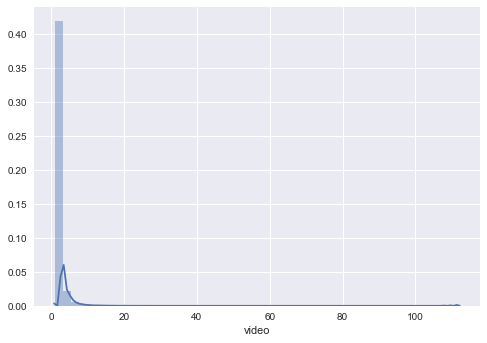

In [15]:
sns.distplot(video_num)

In [16]:
# 用户看视频的个数和留存的关系（统计和画图）

In [17]:
delay.head(5)

,user,video,delay
0,3,0,2275
1,3,1,839
2,5,2,119
3,6,3,70
4,9,4,66


In [18]:
retain.head(5)

,user,retain
0,0,1
1,1,1
2,2,0
3,3,1
4,4,1


In [21]:
video_num_df = delay.groupby('user')['video'].count().to_frame()

In [29]:
video_num_df.reset_index(inplace=True)

In [32]:
whole_df = pd.merge(video_num_df, retain, how='inner')

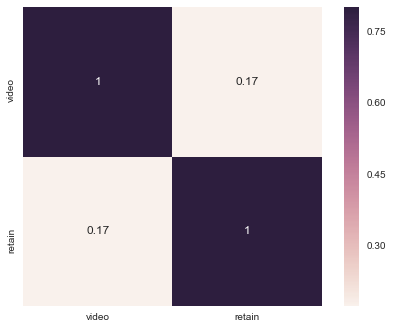

In [37]:
sns.heatmap(whole_df[['video','retain']].corr(), vmax=0.8, annot=True, square=True)

In [40]:
retain['retain'].mean()

0.3869098356774163

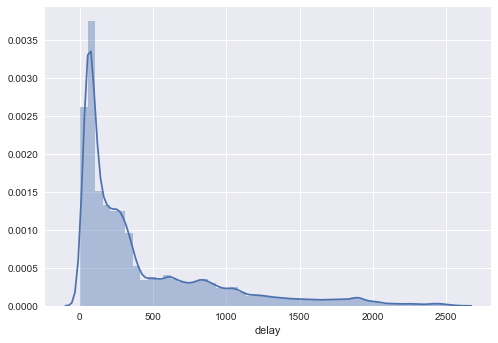

In [100]:
sns.distplot(delay.loc[delay['delay']<delay['delay'].quantile(0.99),'delay'], )

In [44]:
delay.loc[:, 'bucket_qcut'] = pd.qcut(delay['delay'], q=100)

In [60]:
bucket_user_num = delay.groupby('bucket_qcut')['user'].nunique()

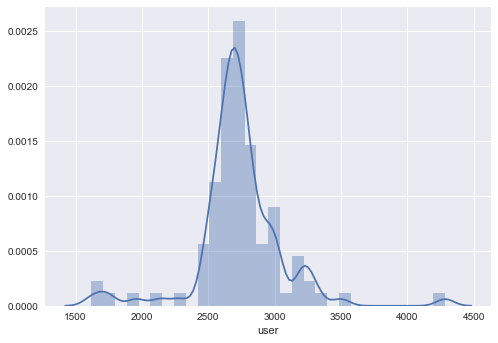

In [61]:
sns.distplot(bucket_user_num)

In [62]:
delay['delay'].mean()

505.99746818434164

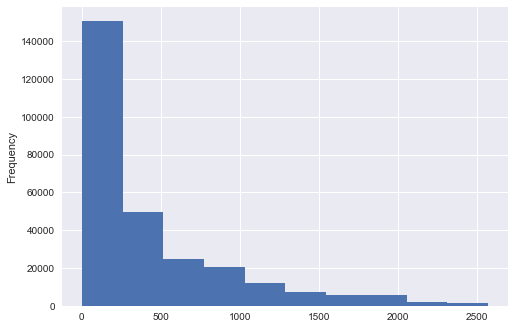

In [65]:
delay.loc[delay['delay']<delay['delay'].quantile(0.99),'delay'].plot(kind='hist')

In [67]:
delay.loc[:, 'bucket_qcut'] = pd.qcut(x=delay['delay'], q=100)
bucket_user_num = delay.groupby('bucket_qcut')['user'].nunique()

In [69]:
delay['delay'].quantile([0.5,0.9,0.95,0.99])

0.50     236.0
0.90    1205.0
0.95    1715.0
0.99    2571.0
Name: delay, dtype: float64

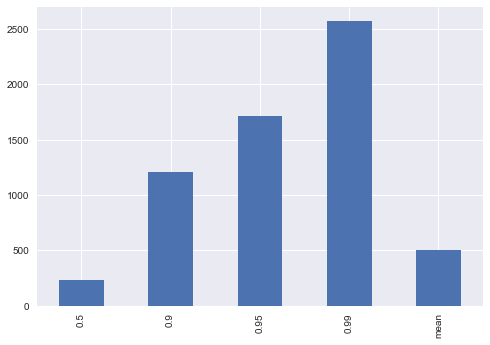

In [70]:
s = delay['delay'].quantile([0.5,0.9,0.95,0.99])
s['mean'] = delay['delay'].mean()
s.plot(kind='bar')

In [71]:
merge_df = pd.merge(delay, retain, on='user', how='inner')

In [73]:
merge_df.loc[:, 'bucket_cut'] = merge_df['delay'] // 100

In [92]:
bucket_cut_retain_dis = merge_df.groupby('bucket_cut')['retain'].mean()
bucket_cut_retain_dis.value_counts()

1.000000    87
0.000000    41
0.500000    18
0.666667     4
0.571429     3
0.333333     3
0.363636     3
0.555556     2
0.750000     2
0.714286     2
0.494424     1
0.525151     1
0.453355     1
0.400000     1
0.481175     1
0.572016     1
0.461520     1
0.470542     1
0.473756     1
0.444444     1
0.466963     1
0.461373     1
0.539623     1
0.588235     1
0.637931     1
0.833333     1
0.496617     1
0.428571     1
0.857143     1
0.480811     1
0.480205     1
0.583333     1
0.526316     1
0.727273     1
0.485737     1
0.569288     1
0.482350     1
0.846154     1
0.352941     1
0.487010     1
0.451978     1
0.478187     1
0.615385     1
0.513274     1
0.475194     1
0.465559     1
0.516616     1
0.456647     1
0.533333     1
0.467423     1
0.529412     1
0.360294     1
0.418605     1
0.456900     1
0.680000     1
0.477350     1
0.446313     1
0.531835     1
0.503571     1
0.516304     1
Name: retain, dtype: int64

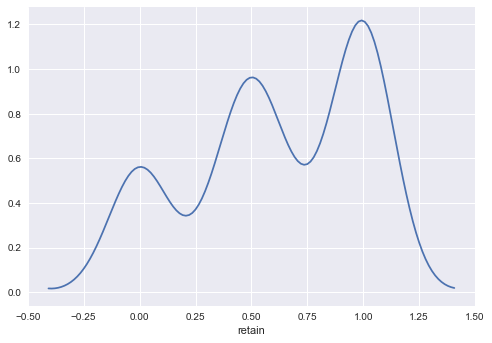

In [96]:
sns.distplot(bucket_cut_retain_dis,hist=False)